In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle as pkl
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [2]:
!pip install xgboost

In [3]:
dataset=pd.read_excel('HealthCareData.xlsx')
dataset

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,946,54,female,rural,5,3,country liquor,negative,negative,NO,...,2.0,5.4,5.2,3.4,NaN,86.0,110,70,no,no
946,947,72,female,urban,4,3,branded liquor,negative,negative,NO,...,2.0,5.3,4.2,3.5,NaN,110.0,110,70,no,no
947,948,47,male,urban,7,3,country liquor,Positive,Positive,NO,...,2.0,6.4,4.2,2.5,1.68,90.0,110,70,no,no
948,949,54,female,rural,9,3,country liquor,Positive,Positive,NO,...,2.0,5.9,4.2,2.5,1.8,110.0,110,70,no,no


In [4]:
dataset.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


In [5]:
dataset.shape

(950, 42)

In [49]:
dataset.isnull().any()

S.NO                                       False
Age                                        False
Gender                                     False
Place(location where the patient lives)    False
Duration of alcohol consumption(years)     False
Alcohol_Quantity                           False
Type of alcohol consumed                   False
Hepatitis B infection                      False
Hepatitis C infection                      False
Diabetes Result                            False
Blood pressure (mmhg)                      False
Obesity                                    False
Family history of cirrhosis/ hereditary    False
TCH                                        False
TG                                         False
LDL                                        False
HDL                                        False
Hemoglobin  (g/dl)                         False
PCV  (%)                                   False
RBC  (million cells/microliter)            False
MCV   (femtoliters/c

In [7]:
df_cleaned = dataset.dropna(inplace=True)
df_cleaned

In [8]:
dataset.isnull().sum()

S.NO                                                                       0
Age                                                                        0
Gender                                                                     0
Place(location where the patient lives)                                    0
Duration of alcohol consumption(years)                                     0
Quantity of alcohol consumption (quarters/day)                             0
Type of alcohol consumed                                                   0
Hepatitis B infection                                                      0
Hepatitis C infection                                                      0
Diabetes Result                                                            0
Blood pressure (mmhg)                                                      0
Obesity                                                                    0
Family history of cirrhosis/ hereditary                                    0

In [9]:
categorical_features=dataset.select_dtypes(include=['object', 'string', 'category'])
categorical_features.columns

Index(['Gender', 'Place(location where the patient lives)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TG', 'LDL',
       'Total Bilirubin    (mg/dl)', 'A/G Ratio',
       'USG Abdomen (diffuse liver or  not)',
       'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'],
      dtype='object')

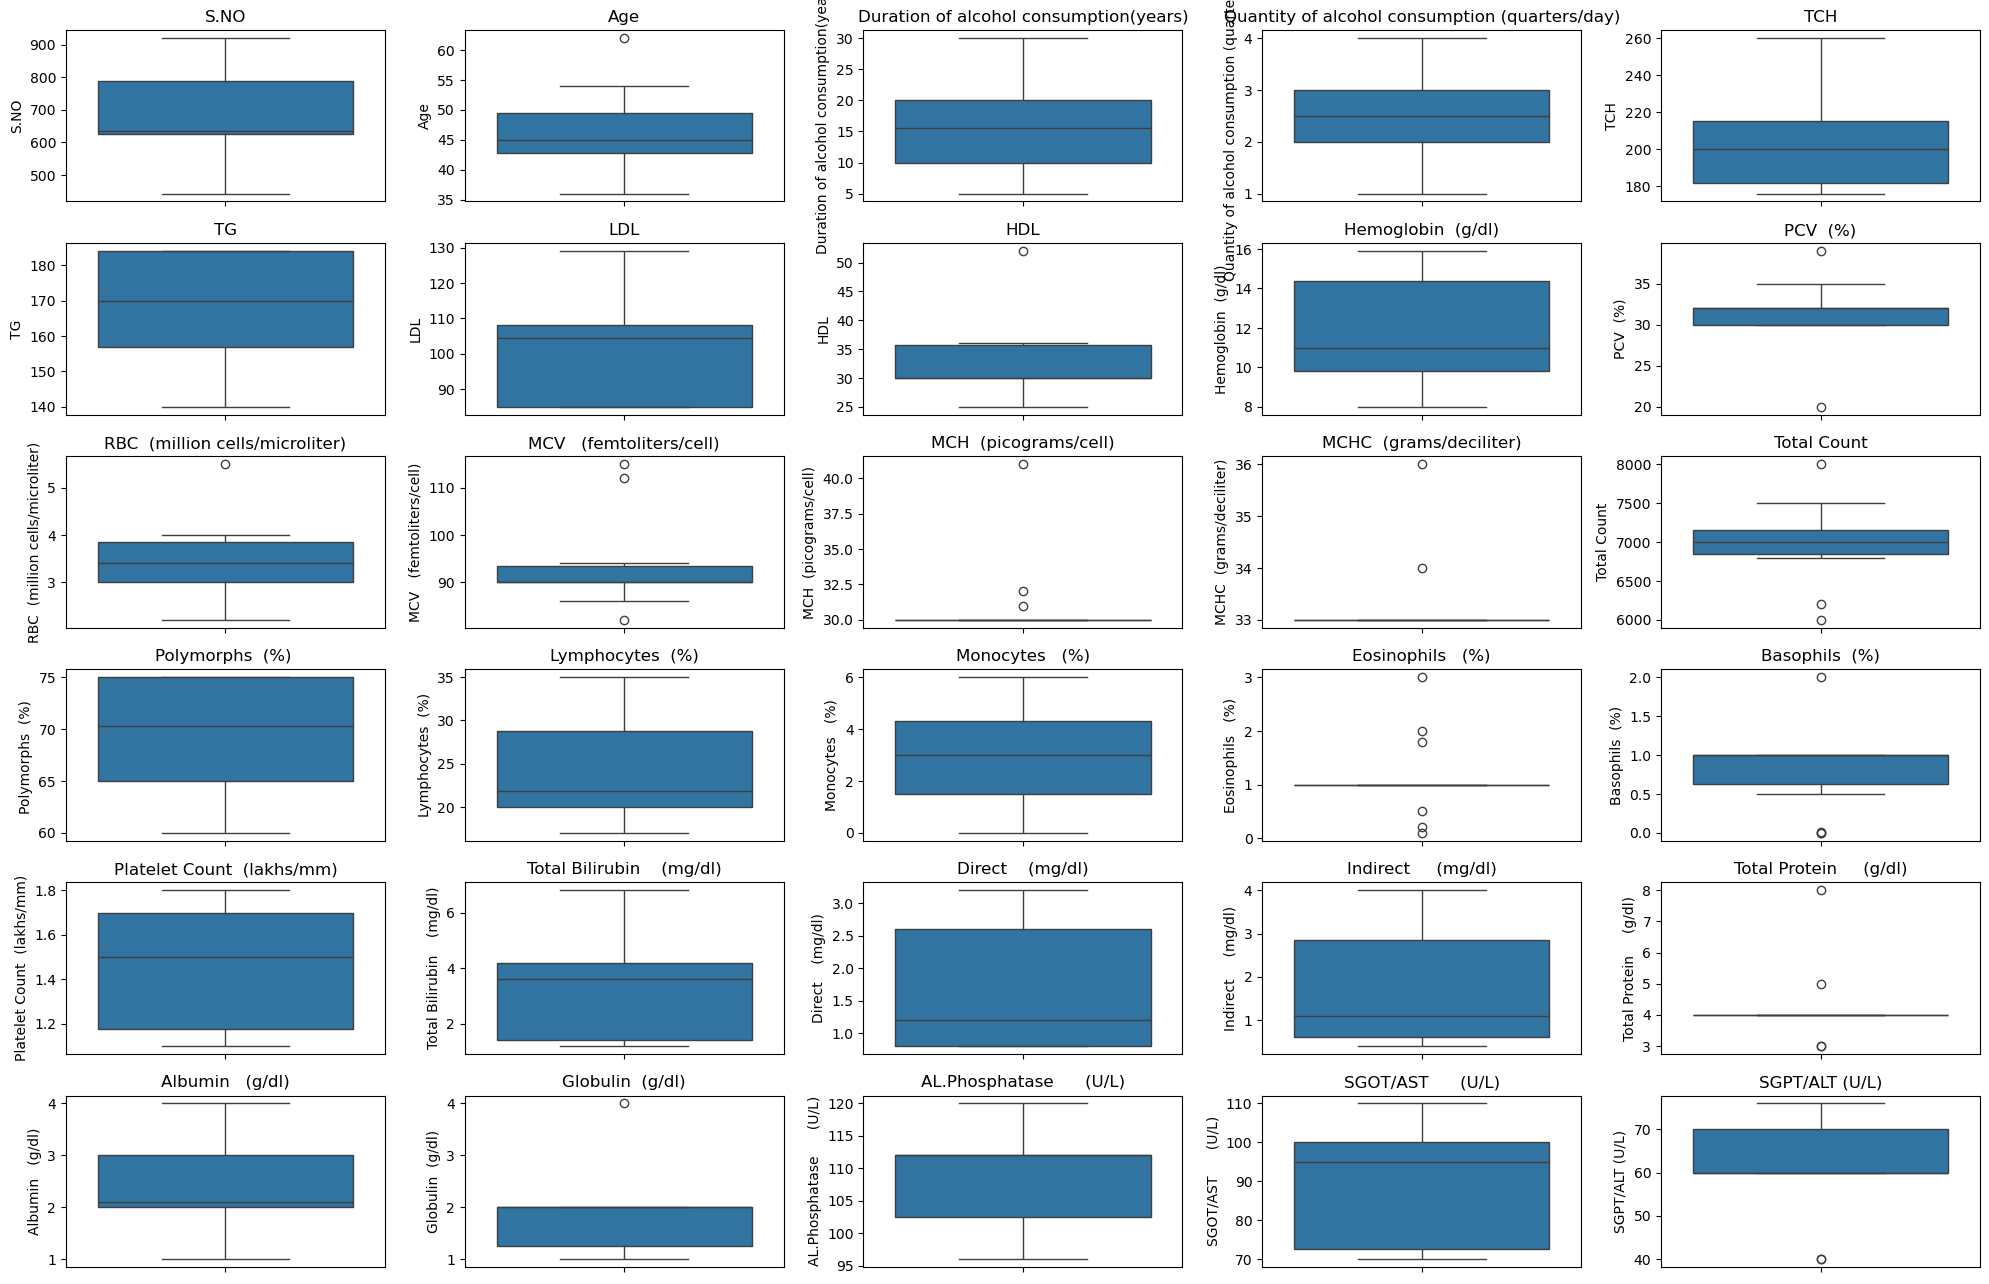

In [10]:
c=0
plt.figure(figsize=(20,15))
for i in dataset.columns:
    if type(dataset[i].iloc[0])!=str:
        plt.subplot(7,5,c+1)
        sns.boxplot(y=dataset[i])
        plt.title(i)
        c+=1
plt.tight_layout()
plt.show()

In [11]:
for col in dataset.columns:
    print(f"'{col}'")

'S.NO'
'Age'
'Gender'
'Place(location where the patient lives)'
'Duration of alcohol consumption(years)'
'Quantity of alcohol consumption (quarters/day)'
'Type of alcohol consumed'
'Hepatitis B infection'
'Hepatitis C infection'
'Diabetes Result'
'Blood pressure (mmhg)'
'Obesity'
'Family history of cirrhosis/ hereditary'
'TCH'
'TG'
'LDL'
'HDL'
'Hemoglobin  (g/dl)'
'PCV  (%)'
'RBC  (million cells/microliter)'
'MCV   (femtoliters/cell)'
'MCH  (picograms/cell)'
'MCHC  (grams/deciliter)'
'Total Count'
'Polymorphs  (%) '
'Lymphocytes  (%)'
'Monocytes   (%)'
'Eosinophils   (%)'
'Basophils  (%)'
'Platelet Count  (lakhs/mm)'
'Total Bilirubin    (mg/dl)'
'Direct    (mg/dl)'
'Indirect     (mg/dl)'
'Total Protein     (g/dl)'
'Albumin   (g/dl)'
'Globulin  (g/dl)'
'A/G Ratio'
'AL.Phosphatase      (U/L)'
'SGOT/AST      (U/L)'
'SGPT/ALT (U/L)'
'USG Abdomen (diffuse liver or  not)'
'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'


In [12]:
[e for e in dataset.columns if 'eosin' in e.lower()]

['Eosinophils   (%)']

In [13]:
col = ['Eosinophils   (%)']
q1 = dataset[col].quantile(0.25)
q3 = dataset[col].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
dataset[col] = np.where(
    dataset[col] > upper_limit, upper_limit,
    np.where(dataset[col] < lower_limit, lower_limit, dataset[col])
)

<Axes: ylabel='Eosinophils   (%)'>

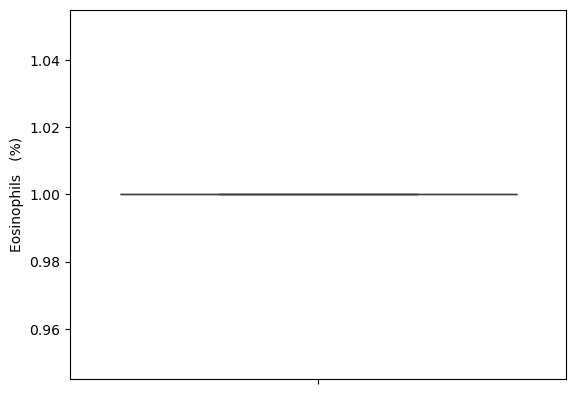

In [14]:
sns.boxplot(dataset['Eosinophils   (%)'])

<Axes: ylabel='Basophils  (%)'>

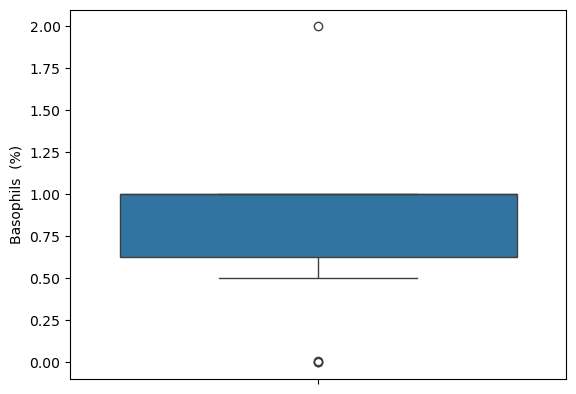

In [15]:
sns.boxplot(dataset['Basophils  (%)'])

In [16]:
q1= dataset['Basophils  (%)'].quantile(0.25)
q3= dataset['Basophils  (%)'].quantile(0.75)
iqr=q3-q1
upper_limit= q3 +(1.5*iqr)
lower_limit= q1 -(1.5*iqr)
dataset['Basophils  (%)'] = np.where(dataset['Basophils  (%)'] >upper_limit, upper_limit,
np.where(dataset['Basophils  (%)'] < lower_limit, lower_limit, dataset['Basophils  (%)']))

<Axes: ylabel='Basophils  (%)'>

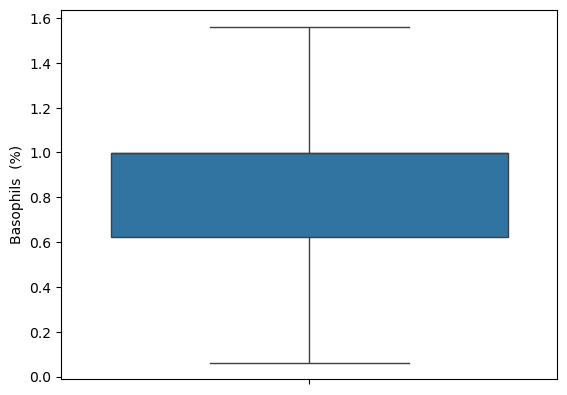

In [17]:
sns.boxplot(dataset['Basophils  (%)'])

In [18]:
x = dataset.drop('Eosinophils   (%)', axis=1)  # Features
y = dataset['Eosinophils   (%)']             # Labels/Target

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
x_train

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
913,914,52,male,rural,20,3,both,negative,negative,NO,...,3.0,4.0,3.0,1.0,03:01:00,120.0,110,70,no,YES
631,632,45,male,rural,10,2,branded liquor,negative,negative,NO,...,0.6,4.0,2.0,2.0,1900-01-01 00:00:00,112.0,100,60,YES,YES
639,640,45,male,urban,10,2,branded liquor,negative,negative,NO,...,0.6,4.0,2.0,2.0,1900-01-01 00:00:00,112.0,100,60,YES,YES
449,450,48,male,rural,28,2,both,negative,negative,NO,...,1.2,8.0,4.0,4.0,1900-01-01 00:00:00,100.0,80,72,YES,YES
446,447,48,male,urban,25,3,branded liquor,negative,negative,NO,...,2.4,4.0,2.0,2.0,1900-01-01 00:00:00,111.0,104,76,YES,YES
919,920,50,male,ocun,20,3,both,negative,negative,NO,...,3.0,4.0,3.0,1.0,03:01:00,120.0,110,70,no,YES
624,625,45,male,rural,20,4,branded liquor,negative,negative,NO,...,4.0,3.0,1.0,2.0,12:00:00,112.0,74,40,YES,YES
638,639,62,male,urban,30,3,branded liquor,negative,negative,YES,...,3.6,3.0,2.0,1.0,1900-01-02 00:00:00,114.0,70,72,YES,YES
834,835,36,male,rural,5,3,country liquor,negative,negative,NO,...,0.4,4.0,2.2,2.0,1900-01-01 00:00:00,100.0,72,60,YES,YES
623,624,54,female,urban,10,2,branded liquor,negative,negative,NO,...,0.6,4.0,2.0,2.0,1900-01-01 00:00:00,112.0,100,60,YES,YES


In [21]:
 x_test

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
647,648,45,male,rural,10,2,branded liquor,negative,negative,NO,...,0.6,4.0,2.0,2.0,1900-01-01 00:00:00,112.0,100,60,YES,YES
837,838,42,male,rural,10,3,branded liquor,negative,negative,NO,...,0.4,4.0,2.2,2.0,1900-01-01 06:24:00,100.0,72,60,YES,YES
442,443,38,female,rural,16,1,country liquor,negative,negative,NO,...,1.0,5.0,3.0,2.0,1.5:1,96.0,90,60,YES,YES


In [22]:
y_train

913    1.0
631    1.0
639    1.0
449    1.0
446    1.0
919    1.0
624    1.0
638    1.0
834    1.0
623    1.0
633    1.0
Name: Eosinophils   (%), dtype: float64

In [23]:
y_test

647    1.0
837    1.0
442    1.0
Name: Eosinophils   (%), dtype: float64

In [24]:
# Example: convert all categorical columns to numeric
dataset_encoded = pd.get_dummies(dataset, drop_first=True)

# Split features and target
x = dataset_encoded.drop('Eosinophils   (%)', axis=1)  # replace with actual target column
y = dataset_encoded['Eosinophils   (%)']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   

# L1 Normalization
normalizer = Normalizer(norm='l1')
x_train_normalized = normalizer.fit_transform(x_train)
x_test_normalized = normalizer.transform(x_test)


In [25]:
x_train_normalized


array([[9.72061216e-02, 5.53032640e-03, 2.12704861e-03, 3.19057292e-04,
        2.76516320e-02, 2.76516320e-03, 8.50819445e-04, 3.40327778e-03,
        4.25409723e-04, 9.99712848e-03, 3.19057292e-03, 3.50963021e-03,
        7.97643230e-01, 6.91290799e-03, 3.72233507e-03, 1.06352431e-04,
        1.06352431e-04, 1.59528646e-04, 1.27622917e-04, 3.19057292e-04,
        4.25409723e-04, 3.19057292e-04, 1.06352431e-04, 1.27622917e-02,
        1.16987674e-02, 7.44467015e-03, 1.06352431e-04, 1.06352431e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.06352431e-04,
        1.06352431e-04, 0.00000000e+00, 0.00000000e+00, 1.06352431e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.06352431e-04, 1.06352431e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.06352431e-04, 0.00000000e+00, 0.00000000e+00, 0.000000

In [26]:
x_test_normalized

array([[7.60384886e-02, 5.28045060e-03, 1.17343347e-03, 2.34686693e-04,
        2.34686693e-02, 3.52030040e-03, 9.97418446e-04, 3.75498709e-03,
        3.98967379e-04, 1.05609012e-02, 3.52030040e-03, 3.87233044e-03,
        8.21403426e-01, 8.80075100e-03, 2.34686693e-03, 3.52030040e-04,
        1.17343347e-04, 1.99483689e-04, 9.38746773e-05, 7.04060080e-05,
        4.69373387e-04, 2.34686693e-04, 2.34686693e-04, 1.31424548e-02,
        1.17343347e-02, 7.04060080e-03, 1.17343347e-04, 1.17343347e-04,
        0.00000000e+00, 1.17343347e-04, 0.00000000e+00, 1.17343347e-04,
        1.17343347e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.17343347e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.17343347e-04, 0.00000000e+00, 0.000000

In [27]:
dataset.describe()

,S.NO,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),TCH,HDL,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),...,Basophils (%),Platelet Count (lakhs/mm),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L)
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,663.500000,46.571429,16.357143,2.500000,206.285714,32.500000,11.622857,31.285714,3.385714,93.214286,...,0.803571,1.458571,1.614286,1.614286,4.214286,2.385714,1.857143,109.357143,89.428571,61.428571
std,160.714151,6.653100,7.692225,0.759555,30.370605,6.858459,2.709287,4.027379,0.838366,9.149851,...,0.452595,0.257230,0.999890,1.297250,1.188313,0.733650,0.770329,7.479275,15.678080,10.796825
min,443.000000,36.000000,5.000000,1.000000,176.000000,25.000000,8.000000,20.000000,2.200000,82.000000,...,0.062500,1.100000,0.800000,0.400000,3.000000,1.000000,1.000000,96.000000,70.000000,40.000000
25%,624.250000,42.750000,10.000000,2.000000,182.000000,30.000000,9.800000,30.000000,3.000000,90.000000,...,0.625000,1.177500,0.800000,0.600000,4.000000,2.000000,1.250000,102.500000,72.500000,60.000000
50%,636.500000,45.000000,15.500000,2.500000,200.000000,30.000000,11.000000,32.000000,3.400000,90.000000,...,1.000000,1.500000,1.200000,1.100000,4.000000,2.100000,2.000000,112.000000,95.000000,60.000000
75%,788.250000,49.500000,20.000000,3.000000,215.000000,35.750000,14.400000,32.000000,3.850000,93.500000,...,1.000000,1.700000,2.600000,2.850000,4.000000,3.000000,2.000000,112.000000,100.000000,70.000000
max,920.000000,62.000000,30.000000,4.000000,260.000000,52.000000,15.900000,39.000000,5.500000,115.000000,...,1.562500,1.800000,3.200000,4.000000,8.000000,4.000000,4.000000,120.000000,110.000000,76.000000


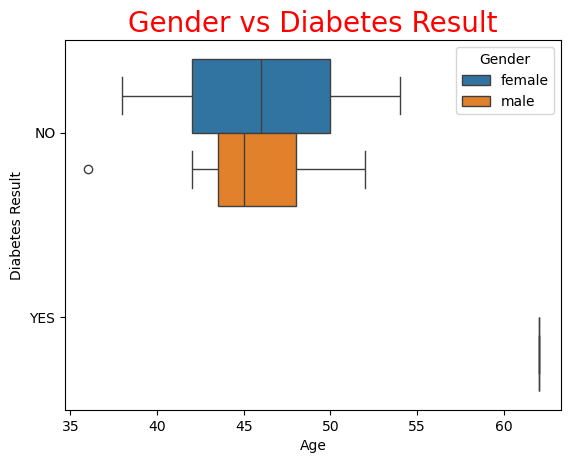

In [28]:
sns.boxplot(x='Age',y='Diabetes Result',data=dataset,hue='Gender')
plt.title('Gender vs Diabetes Result',color='red',size=20)
plt.show()

<Axes: xlabel='Place(location where the patient lives)', ylabel='Age'>

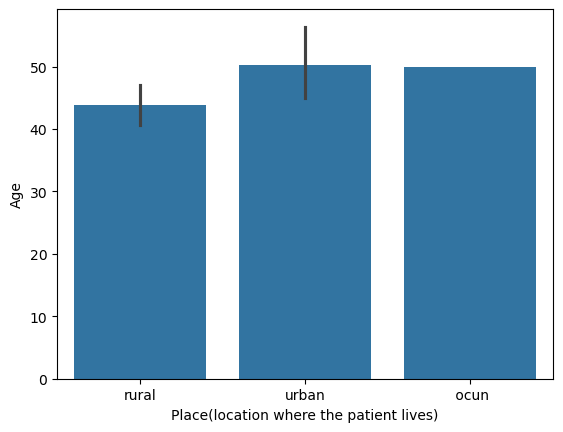

In [29]:
sns.barplot(x=dataset['Place(location where the patient lives)'],y=dataset['Age'])

Text(0.5, 1.0, 'Place vs Age')

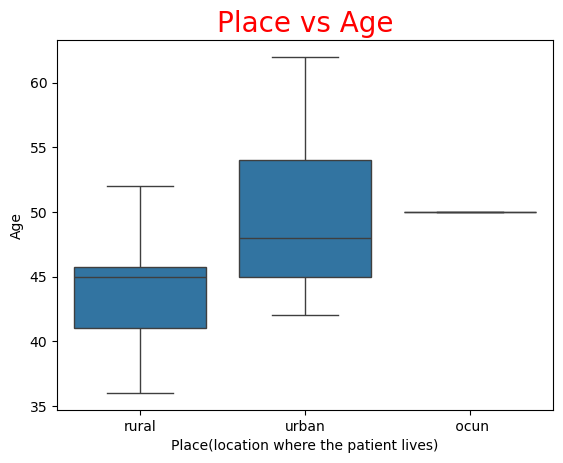

In [30]:
sns.boxplot(x='Place(location where the patient lives)',y='Age',data=dataset)
plt.title('Place vs Age' ,color='red',size=20)

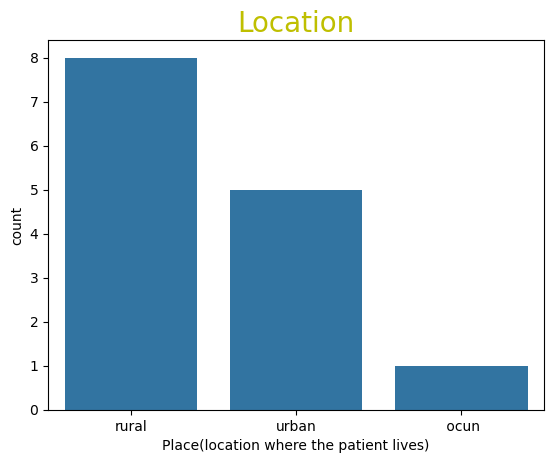

In [31]:
sns.countplot(data=dataset,x='Place(location where the patient lives)')
plt.title("Location",color='y',size=20,loc='center')
plt.show()

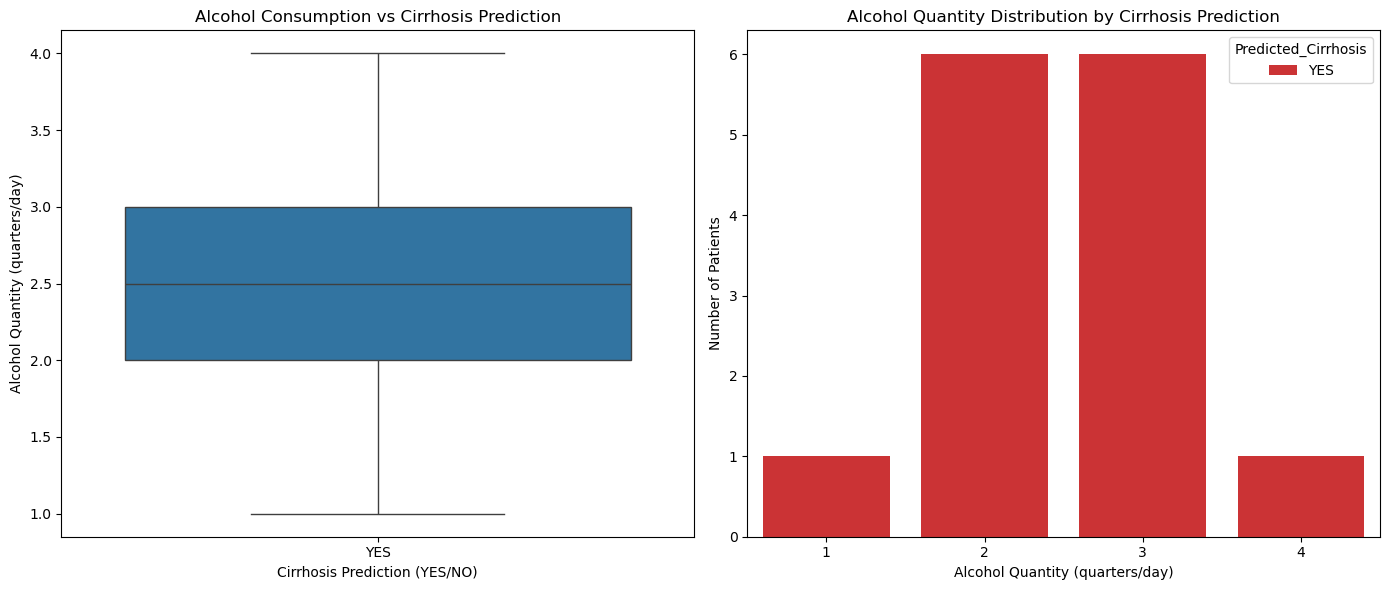

In [32]:
# Rename columns for easier handling
dataset.rename(columns={
    'Quantity of alcohol consumption (quarters/day)': 'Alcohol_Quantity',
    'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)': 'Predicted_Cirrhosis'
}, inplace=True)

# Clean and prepare the data
dataset['Alcohol_Quantity'] = pd.to_numeric(dataset['Alcohol_Quantity'], errors='coerce')
dataset['Predicted_Cirrhosis'] = dataset['Predicted_Cirrhosis'].astype(str).str.strip().str.upper()

# Drop rows with missing values in the relevant columns
plot_df = dataset[['Alcohol_Quantity', 'Predicted_Cirrhosis']].dropna()

# Set up the visualizations
plt.figure(figsize=(14, 6))

# 1. Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(x='Predicted_Cirrhosis', y='Alcohol_Quantity', data=plot_df)
plt.title('Alcohol Consumption vs Cirrhosis Prediction')
plt.xlabel('Cirrhosis Prediction (YES/NO)')
plt.ylabel('Alcohol Quantity (quarters/day)')

# 2. Count Plot
plt.subplot(1, 2, 2)
sns.countplot(data=plot_df, x='Alcohol_Quantity', hue='Predicted_Cirrhosis', palette='Set1')
plt.title('Alcohol Quantity Distribution by Cirrhosis Prediction')
plt.xlabel('Alcohol Quantity (quarters/day)')
plt.ylabel('Number of Patients')

plt.tight_layout()
plt.show()


In [33]:
dataset['Predicted_Cirrhosis'] = dataset['Predicted_Cirrhosis'].astype(str).str.strip().str.upper()
print("Unique values:", dataset['Predicted_Cirrhosis'].unique())
print("Value counts:\n", dataset['Predicted_Cirrhosis'].value_counts())


Unique values: ['YES']
Value counts:
 Predicted_Cirrhosis
YES    14
Name: count, dtype: int64


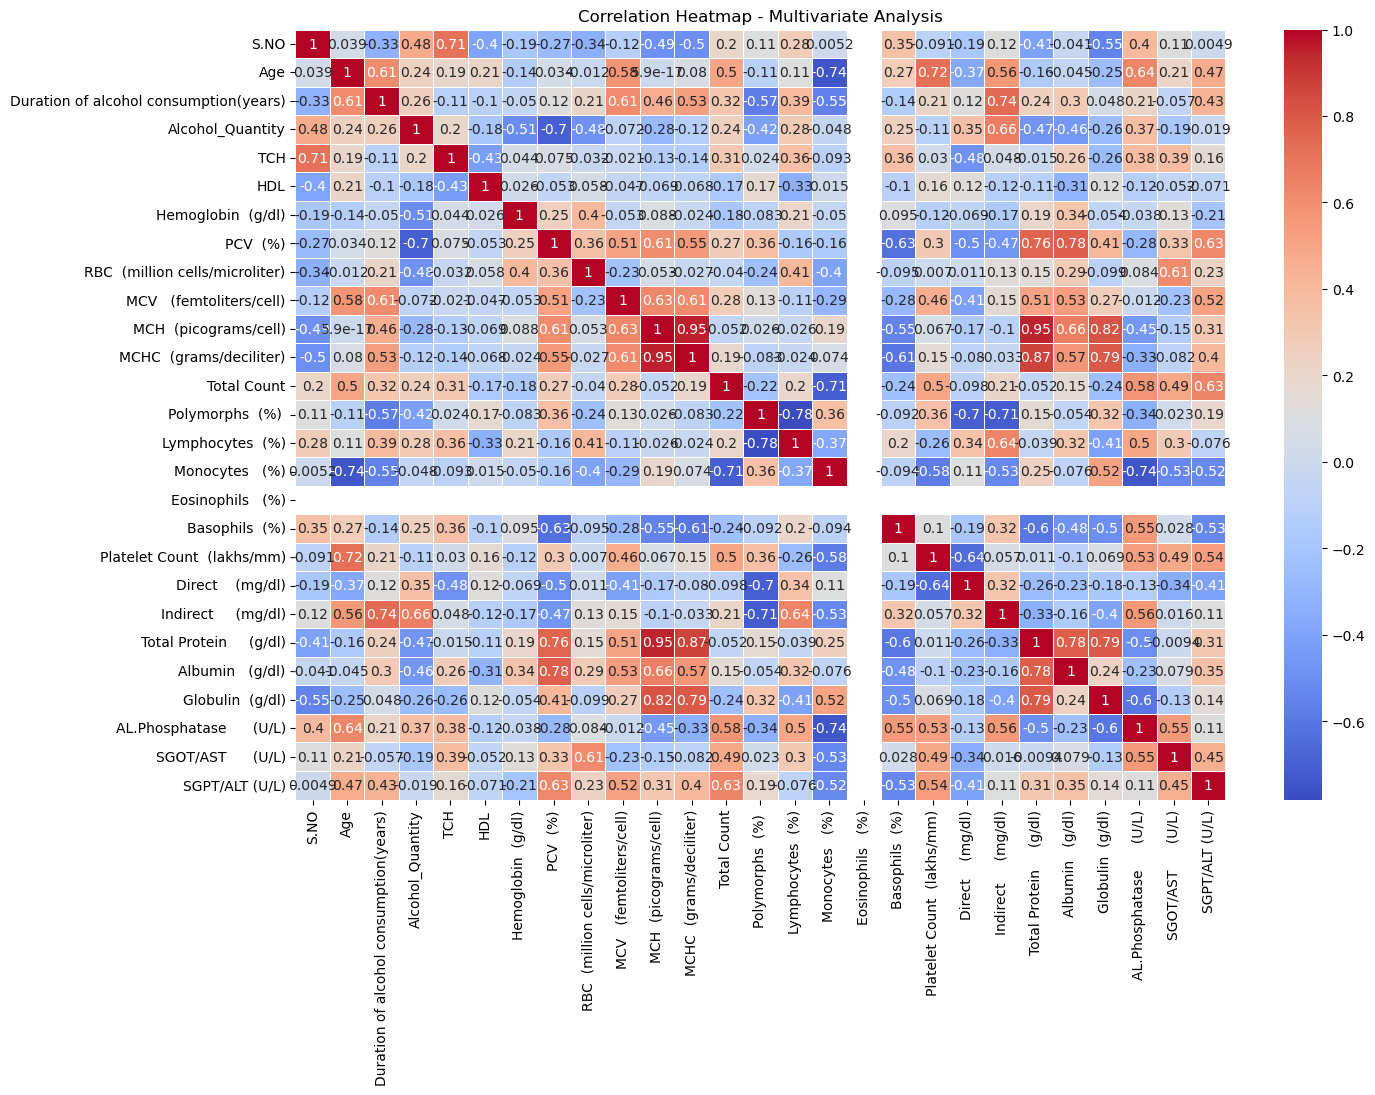

In [34]:
# Select only numeric columns for correlation
numeric_df = dataset.select_dtypes(include=['number'])

# Generate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap - Multivariate Analysis")
plt.show()

In [35]:
from sklearn.naive_bayes import GaussianNB
# Create the model
nb = GaussianNB()
# Fit the model
nb.fit(x_train, y_train)

GaussianNB()

In [36]:
x_train

,S.NO,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),TCH,HDL,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),...,Total Bilirubin (mg/dl)_4.8,Total Bilirubin (mg/dl)_5.0,Total Bilirubin (mg/dl)_6.8,A/G Ratio_1900-01-01 00:00:00,A/G Ratio_12:00:00,A/G Ratio_1900-01-03 00:00:00,A/G Ratio_1900-01-02 00:00:00,A/G Ratio_1900-01-01 06:24:00,A/G Ratio_03:01:00,USG Abdomen (diffuse liver or not)_no
913,914,52,20,3,260.0,26.0,8.0,32.0,4.0,94.0,...,False,False,False,False,False,False,False,False,True,True
631,632,45,10,2,200.0,30.0,14.9,32.0,3.4,90.0,...,False,False,False,True,False,False,False,False,False,False
639,640,45,10,2,200.0,30.0,11.8,32.0,3.4,90.0,...,False,False,False,True,False,False,False,False,False,False
449,450,48,28,2,200.0,30.0,12.0,39.0,3.1,115.0,...,False,False,False,True,False,False,False,False,False,False
446,447,48,25,3,180.0,35.0,9.8,32.0,4.0,88.0,...,False,True,False,True,False,False,False,False,False,False
919,920,50,20,3,256.0,25.0,15.9,32.0,4.0,94.0,...,False,False,False,False,False,False,False,False,True,True
624,625,45,20,4,188.0,34.0,10.2,20.0,3.0,82.0,...,False,False,False,False,True,False,False,False,False,False
638,639,62,30,3,176.0,36.0,9.8,30.0,2.8,112.0,...,True,False,False,False,False,False,True,False,False,False
834,835,36,5,3,176.0,36.0,8.8,30.0,2.2,90.0,...,False,False,True,True,False,False,False,False,False,False
623,624,54,10,2,220.0,52.0,12.9,32.0,3.4,92.0,...,False,False,False,True,False,False,False,False,False,False


In [37]:
y_train

913    1.0
631    1.0
639    1.0
449    1.0
446    1.0
919    1.0
624    1.0
638    1.0
834    1.0
623    1.0
633    1.0
Name: Eosinophils   (%), dtype: float64

In [38]:
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [39]:
print("x_train",x_train)
print("y_train",y_train)

x_train      S.NO  Age  Duration of alcohol consumption(years)  \
913   914   52                                      20   
631   632   45                                      10   
639   640   45                                      10   
449   450   48                                      28   
446   447   48                                      25   
919   920   50                                      20   
624   625   45                                      20   
638   639   62                                      30   
834   835   36                                       5   
623   624   54                                      10   
633   634   42                                      15   

     Quantity of alcohol consumption (quarters/day)    TCH   HDL  \
913                                               3  260.0  26.0   
631                                               2  200.0  30.0   
639                                               2  200.0  30.0   
449                    

In [40]:
k=np.random.randint(1,50,60)

In [41]:
params={'n_neighbors' : k}

In [42]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(knn, params, n_iter=5, cv=5, n_jobs=-1, verbose=0)
random_search.fit(x_train, y_train)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan  1. nan]
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 4, 48, 37, 37, 11, 40, 25, 22,  9, 41, 47,  1, 41,  3, 37,  7, 47,
       17, 33, 14, 21,  6, 34, 30, 33, 42, 46, 46, 37, 34, 33,  8, 10, 41,
       37, 17, 49, 10, 32, 27,  7, 33,  9, 23, 36, 44,  3,  7,  7, 13, 42,
       15, 13, 39, 22, 32, 34, 27, 36, 27])})

In [43]:
print('train_score - ' + str(random_search.score(x_train,y_train)))
print('test_score - ' + str(random_search.score(x_test,y_test)))

train_score - 1.0
test_score - 1.0


Best Parameters: {'n_neighbors': 7}
Accuracy: 1.0


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


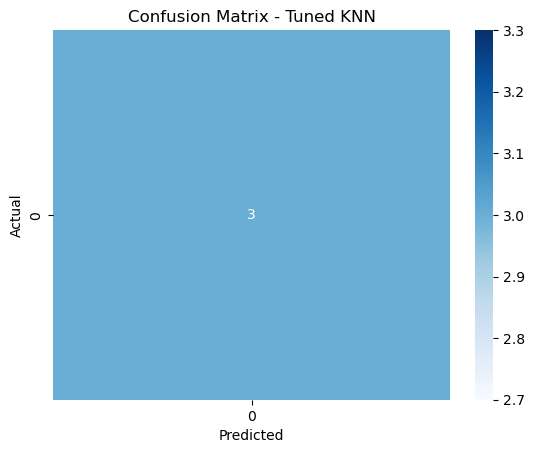

In [ ]:

# Predict using best model
best_knn = random_search.best_estimator_
y_pred = best_knn.predict(x_test)

# Accuracy
print("Best Parameters:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned KNN")
plt.show()

In [48]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Precision: 1.0
Recall: 1.0
F1 Score: 1.0
